In [1]:
# Imporiting initial packages needed for data importing and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
concrete = pd.read_csv('concrete.csv')

In [3]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# Defining Variables
 Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable

 Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable

 Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable

 Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable

 Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable

 Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable

 Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable

 Age(age) -- quantitative -- Day (1~365) -- Input Variable

 Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

In [4]:
concrete.shape

(1030, 9)

In [5]:
concrete.info()
# No missing entries....
# Data all continious and no categorical variables notted...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
# Checking Dublicates
duplicatedrows= concrete[concrete.duplicated(keep="first")]
duplicatedrows

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [7]:
# Removing dublicates
concrete.drop_duplicates(
                     keep = "first", inplace = True)
concrete.shape

(1005, 9)

# Univariate Analysis

In [8]:
# checkning data entry and looking for unusual entries
for col in concrete:
    print(col)
    print(np.sort(concrete[col].unique()))

cement
[102.  108.3 116.  122.6 132.  133.  133.1 134.7 135.  135.7 136.  136.4
 139.6 139.7 139.9 140.  141.3 141.9 142.  143.  143.6 143.7 143.8 144.
 144.8 145.  145.4 145.7 145.9 146.  146.5 147.  147.8 148.  148.1 148.5
 149.  149.5 150.  150.7 150.9 151.  151.6 151.8 152.  152.6 152.7 153.
 153.1 153.6 154.  154.8 155.  155.2 155.6 156.  157.  158.  158.4 158.6
 158.8 159.  159.1 159.8 160.  160.2 162.  164.  164.2 164.6 165.  166.
 166.1 166.8 167.  167.4 168.  168.9 170.3 172.4 173.  173.5 173.8 178.
 181.4 181.9 182.  183.9 184.  186.2 190.  190.3 190.7 192.  193.5 194.7
 198.6 200.  202.  203.5 210.7 212.  212.1 212.5 212.6 213.5 213.7 213.8
 214.9 218.2 218.9 220.8 222.4 225.  228.  229.7 230.  231.8 233.8 234.
 236.  236.9 237.  237.5 238.  238.1 238.2 239.6 246.8 249.1 250.  250.2
 251.4 251.8 252.  252.1 252.3 252.5 254.  255.  255.3 255.5 259.9 260.
 260.9 261.  261.9 262.  264.5 265.  266.  266.2 272.6 272.8 273.  275.
 275.1 276.  276.4 277.  277.1 277.2 279.8 280.  28

In [9]:
concrete.describe()
# Univariate analysis... chevking the mean and quartiles
# Outliers present in slag, water, superplastic, fineagg and age

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


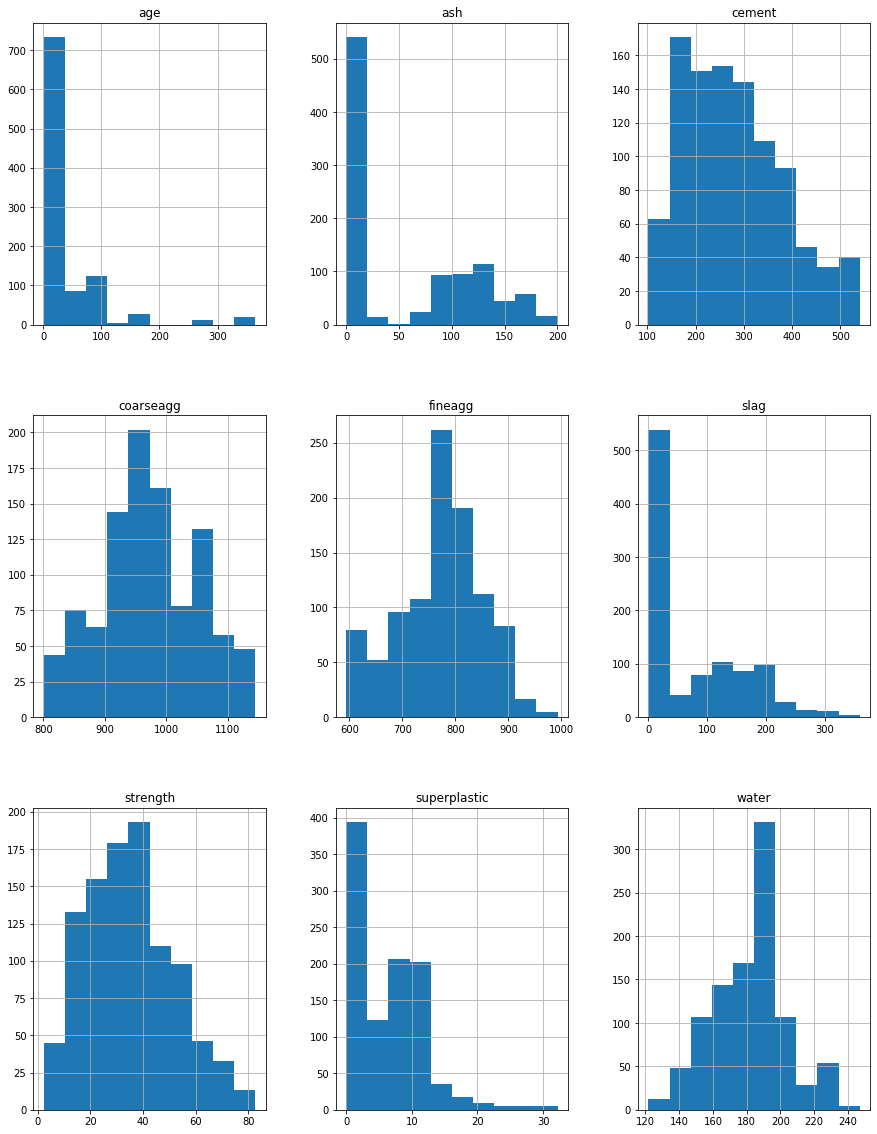

In [10]:
hist = concrete.hist(figsize = (15,20))
# Data Skewness is well demonstrated in age, ash, slag, superplastic
# While there is less skewness in the rest of attributes

In [11]:
concrete.skew()

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

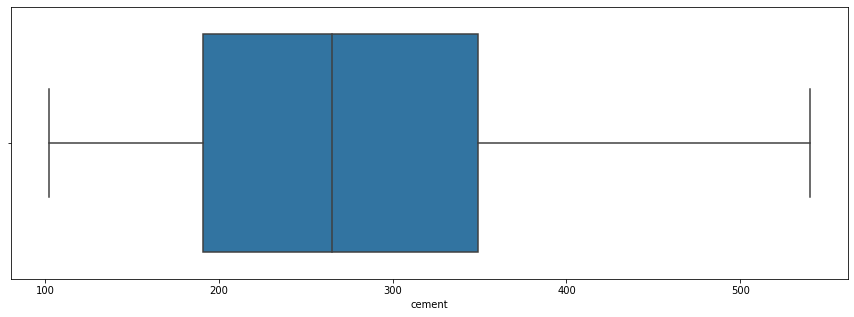

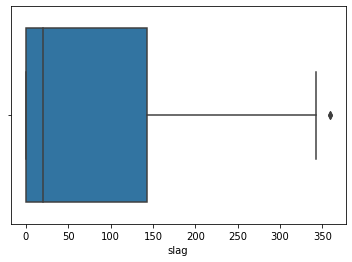

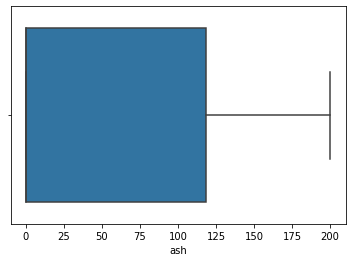

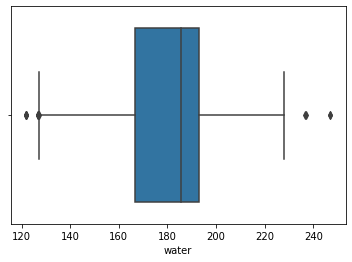

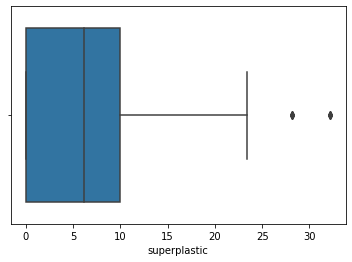

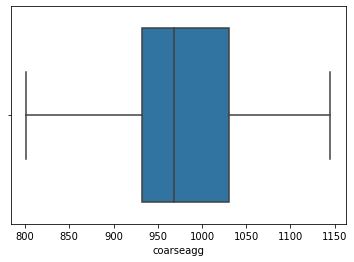

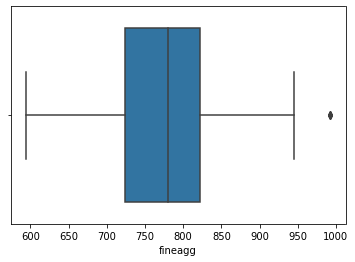

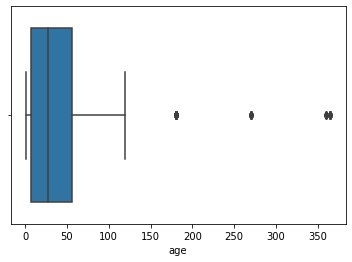

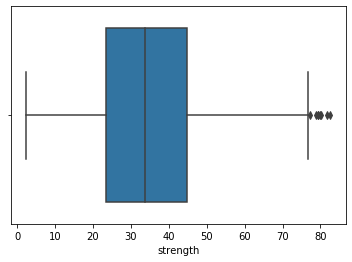

<Figure size 432x288 with 0 Axes>

In [12]:
fig, ax = plt.subplots(figsize = (15,5))
for i in concrete:    
    sns.boxplot(concrete[i])
    plt.figure()

    # Outliers is clearly seen by the following graphs in strenght','age','fineagg','superplastic','water','slag' and 'age'

In [13]:
# Outlier treatment (Capping)
columns=['strength','age','fineagg','superplastic','water','slag']
for i in columns:
    ninty=concrete[i].quantile(0.99)
    concrete[i] = np.where(concrete[i] >ninty, ninty,concrete[i])
columns=['age']
for i in columns:
    ninty=concrete[i].quantile(0.95)
    concrete[i] = np.where(concrete[i] >ninty, ninty,concrete[i])

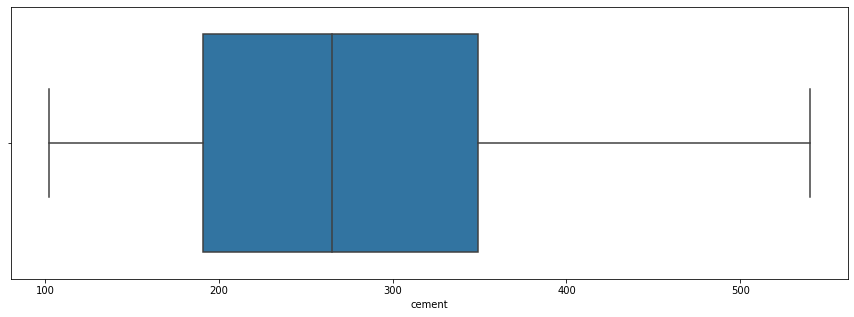

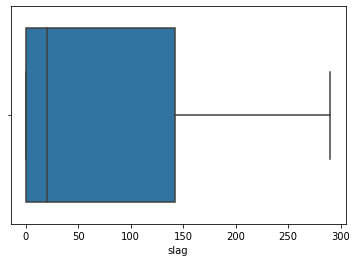

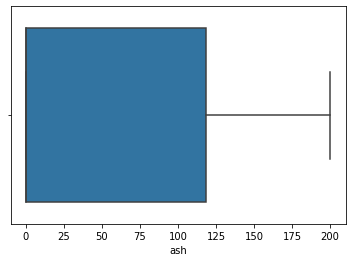

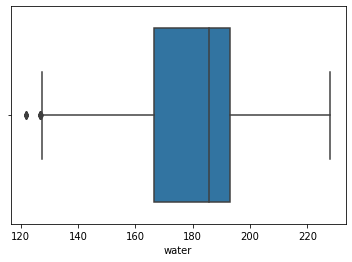

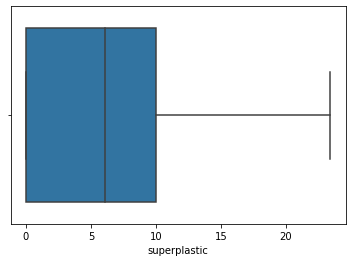

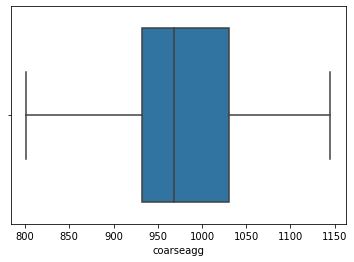

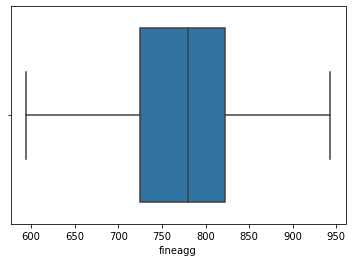

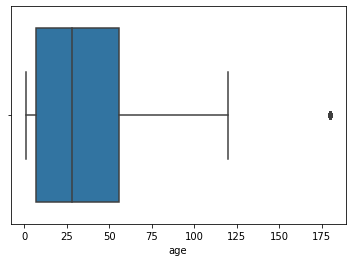

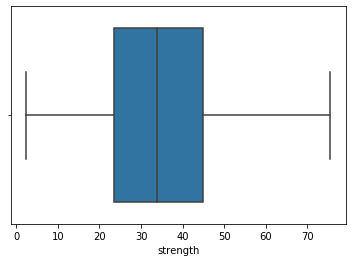

<Figure size 432x288 with 0 Axes>

In [14]:
# After outlier treatment view
fig, ax = plt.subplots(figsize = (15,5))
for i in concrete:    
    sns.boxplot(concrete[i])
    plt.figure()



# Bivariate analysis

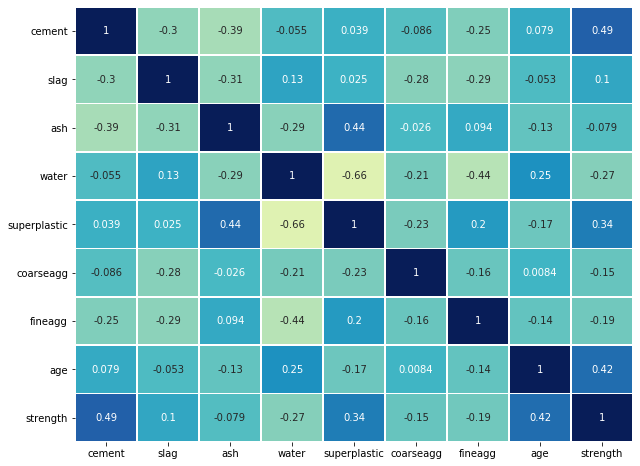

In [15]:
plt.figure(figsize=(10,8))

sns.heatmap(concrete.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()
# there is some liear correlation noticed is between cement and strength (the terget attribute) (0.49). as well noiced
# between ash and superplastic (0.51)
# While neqative correlation is seen between superplastic and water attributes

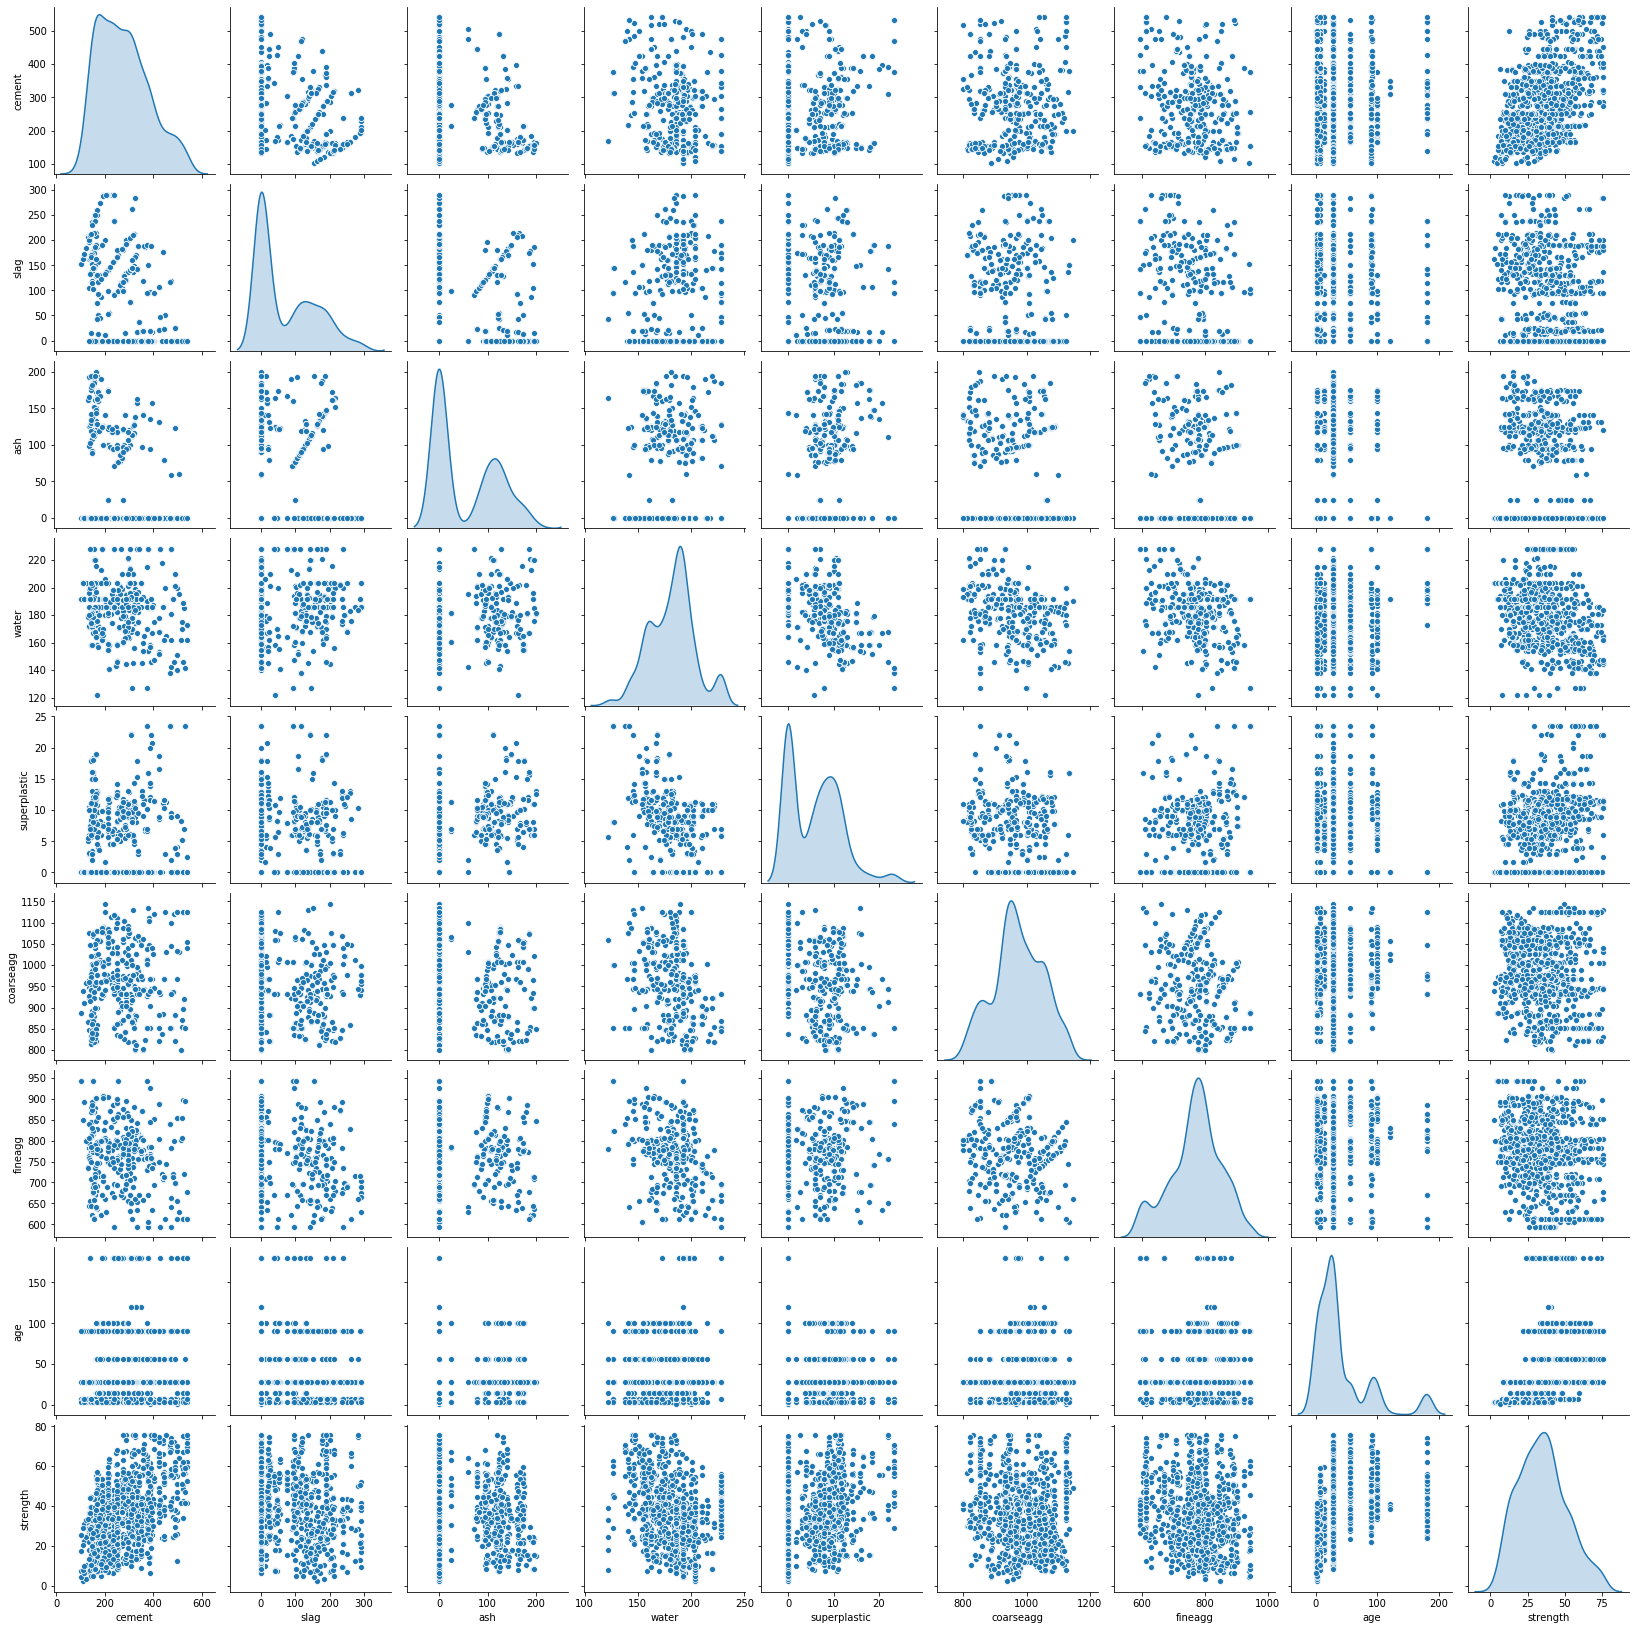

In [16]:
sns.pairplot(concrete, palette="husl", diag_kind="kde")
# similar findings compared with the previous Corr heatmap

# Model prepiration and performance testing
Dropping the supraplastic attribute can be done as it is highly correlaying with other included attribute (water)
i would dropprd it if the correlation was more than 0.7

SO we will proceed with same dataframe

In [17]:
from sklearn.model_selection import train_test_split
X = concrete.drop(['strength'], axis=1)
y = concrete[['strength']]

# Spliting the data...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [18]:
# Trying different models to decide on which gives better results

from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kfold = KFold(n_splits=5, shuffle= True, random_state= 50)
scoring = ['r2', 'max_error']

linear= LinearRegression()
results = cross_validate(linear, X_train, y_train, cv=kfold, scoring=scoring, return_train_score=True)
validation= results['test_r2'].mean()
validation_std=results['test_r2'].std()
validation_max_error=results['test_max_error'].mean()
validation_max_error_std=results['test_max_error'].std()
train= results['train_r2'].mean()
train_std=results['train_r2'].std()
train_max_error=results['train_max_error'].mean()
train_max_error_std=results['train_max_error'].std()

In [19]:
resultsDf=[]
resultsDf = pd.DataFrame({'Method':['Linear Regression'], 'Train Acc.': '$\pm$'.join((str(round(train,4)), str(round(train_std,4)))),
                          'Validation Acc':  '$\pm$'.join((str(round(validation,4)), str(round(validation_std,4)))),
                          'Train Max Error': '$\pm$'.join((str(round(train_max_error,4)), str(round(train_max_error_std,4)))),
                          'Validation Max Error': '$\pm$'.join((str(round(validation_max_error,4)), str(round(validation_max_error_std,4))))})
resultsDf.reset_index(drop=True)

,Method,Train Acc.,Validation Acc,Train Max Error,Validation Max Error
0,Linear Regression,0.6832$\pm$0.0105,0.6682$\pm$0.0434,-29.4187$\pm$0.3303,-26.7637$\pm$2.6642


In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X_train)
print(X.shape)
print(X_poly.shape)

(1005, 8)
(804, 45)


In [21]:
kfold = KFold(n_splits=5, shuffle= True, random_state= 50)
scoring = ['r2', 'max_error']

results = cross_validate(linear, X_poly, y_train, cv=kfold, scoring=scoring, return_train_score=True)
validation= results['test_r2'].mean()
validation_std=results['test_r2'].std()
validation_max_error=results['test_max_error'].mean()
validation_max_error_std=results['test_max_error'].std()
train= results['train_r2'].mean()
train_std=results['train_r2'].std()
train_max_error=results['train_max_error'].mean()
train_max_error_std=results['train_max_error'].std()

In [22]:
PolynomialDf = pd.DataFrame({'Method':['Polynomial'], 'Train Acc.': '$\pm$'.join((str(round(train,4)), str(round(train_std,4)))),
                          'Validation Acc':  '$\pm$'.join((str(round(validation,4)), str(round(validation_std,4)))),
                          'Train Max Error': '$\pm$'.join((str(round(train_max_error,4)), str(round(train_max_error_std,4)))),
                          'Validation Max Error': '$\pm$'.join((str(round(validation_max_error,4)), str(round(validation_max_error_std,4))))})
resultsDf = pd.concat([resultsDf, PolynomialDf])
resultsDf.reset_index(drop=True)

,Method,Train Acc.,Validation Acc,Train Max Error,Validation Max Error
0,Linear Regression,0.6832$\pm$0.0105,0.6682$\pm$0.0434,-29.4187$\pm$0.3303,-26.7637$\pm$2.6642
1,Polynomial,0.848$\pm$0.0054,0.8184$\pm$0.0252,-23.8316$\pm$1.2482,-22.3159$\pm$2.2561


In [23]:
from sklearn.linear_model import Lasso

kfold = KFold(n_splits=5, shuffle= True, random_state= 50)
scoring = ['r2', 'max_error']

lasso= Lasso()
results = cross_validate(lasso, X_train, y_train, cv=kfold, scoring=scoring, return_train_score=True)
validation= results['test_r2'].mean()
validation_std=results['test_r2'].std()
validation_max_error=results['test_max_error'].mean()
validation_max_error_std=results['test_max_error'].std()
train= results['train_r2'].mean()
train_std=results['train_r2'].std()
train_max_error=results['train_max_error'].mean()
train_max_error_std=results['train_max_error'].std()

In [24]:
lassoDf = pd.DataFrame({'Method':['lasso'], 'Train Acc.': '$\pm$'.join((str(round(train,4)), str(round(train_std,4)))),
                          'Validation Acc':  '$\pm$'.join((str(round(validation,4)), str(round(validation_std,4)))),
                          'Train Max Error': '$\pm$'.join((str(round(train_max_error,4)), str(round(train_max_error_std,4)))),
                          'Validation Max Error': '$\pm$'.join((str(round(validation_max_error,4)), str(round(validation_max_error_std,4))))})
resultsDf = pd.concat([resultsDf, lassoDf])
resultsDf.reset_index(drop=True)

,Method,Train Acc.,Validation Acc,Train Max Error,Validation Max Error
0,Linear Regression,0.6832$\pm$0.0105,0.6682$\pm$0.0434,-29.4187$\pm$0.3303,-26.7637$\pm$2.6642
1,Polynomial,0.848$\pm$0.0054,0.8184$\pm$0.0252,-23.8316$\pm$1.2482,-22.3159$\pm$2.2561
2,lasso,0.6829$\pm$0.0105,0.6681$\pm$0.0413,-29.6058$\pm$0.4629,-26.8801$\pm$2.6308


In [25]:
from sklearn.linear_model import Ridge

kfold = KFold(n_splits=5, shuffle= True, random_state= 50)
scoring = ['r2', 'max_error']

Ridge= Ridge()
results = cross_validate(Ridge, X_train, y_train, cv=kfold, scoring=scoring, return_train_score=True)
validation= results['test_r2'].mean()
validation_std=results['test_r2'].std()
validation_max_error=results['test_max_error'].mean()
validation_max_error_std=results['test_max_error'].std()
train= results['train_r2'].mean()
train_std=results['train_r2'].std()
train_max_error=results['train_max_error'].mean()
train_max_error_std=results['train_max_error'].std()

In [26]:
RidgeDf = pd.DataFrame({'Method':['Ridge'], 'Train Acc.': '$\pm$'.join((str(round(train,4)), str(round(train_std,4)))),
                          'Validation Acc':  '$\pm$'.join((str(round(validation,4)), str(round(validation_std,4)))),
                          'Train Max Error': '$\pm$'.join((str(round(train_max_error,4)), str(round(train_max_error_std,4)))),
                          'Validation Max Error': '$\pm$'.join((str(round(validation_max_error,4)), str(round(validation_max_error_std,4))))})
resultsDf = pd.concat([resultsDf, RidgeDf])
resultsDf.reset_index(drop=True)

,Method,Train Acc.,Validation Acc,Train Max Error,Validation Max Error
0,Linear Regression,0.6832$\pm$0.0105,0.6682$\pm$0.0434,-29.4187$\pm$0.3303,-26.7637$\pm$2.6642
1,Polynomial,0.848$\pm$0.0054,0.8184$\pm$0.0252,-23.8316$\pm$1.2482,-22.3159$\pm$2.2561
2,lasso,0.6829$\pm$0.0105,0.6681$\pm$0.0413,-29.6058$\pm$0.4629,-26.8801$\pm$2.6308
3,Ridge,0.6832$\pm$0.0105,0.6682$\pm$0.0434,-29.4187$\pm$0.3304,-26.7638$\pm$2.6642


In [27]:
from sklearn.linear_model import ElasticNet

kfold = KFold(n_splits=5, shuffle= True, random_state= 50)
scoring = ['r2', 'max_error']

ElasticNet= ElasticNet()
results = cross_validate(ElasticNet, X_train, y_train, cv=kfold, scoring=scoring, return_train_score=True)
validation= results['test_r2'].mean()
validation_std=results['test_r2'].std()
validation_max_error=results['test_max_error'].mean()
validation_max_error_std=results['test_max_error'].std()
train= results['train_r2'].mean()
train_std=results['train_r2'].std()
train_max_error=results['train_max_error'].mean()
train_max_error_std=results['train_max_error'].std()

In [28]:
ElasticNetDf = pd.DataFrame({'Method':['ElasticNet'], 'Train Acc.': '$\pm$'.join((str(round(train,4)), str(round(train_std,4)))),
                          'Validation Acc':  '$\pm$'.join((str(round(validation,4)), str(round(validation_std,4)))),
                          'Train Max Error': '$\pm$'.join((str(round(train_max_error,4)), str(round(train_max_error_std,4)))),
                          'Validation Max Error': '$\pm$'.join((str(round(validation_max_error,4)), str(round(validation_max_error_std,4))))})
resultsDf = pd.concat([resultsDf, ElasticNetDf])
resultsDf.reset_index(drop=True)

,Method,Train Acc.,Validation Acc,Train Max Error,Validation Max Error
0,Linear Regression,0.6832$\pm$0.0105,0.6682$\pm$0.0434,-29.4187$\pm$0.3303,-26.7637$\pm$2.6642
1,Polynomial,0.848$\pm$0.0054,0.8184$\pm$0.0252,-23.8316$\pm$1.2482,-22.3159$\pm$2.2561
2,lasso,0.6829$\pm$0.0105,0.6681$\pm$0.0413,-29.6058$\pm$0.4629,-26.8801$\pm$2.6308
3,Ridge,0.6832$\pm$0.0105,0.6682$\pm$0.0434,-29.4187$\pm$0.3304,-26.7638$\pm$2.6642
4,ElasticNet,0.6831$\pm$0.0105,0.6683$\pm$0.042,-29.5173$\pm$0.4225,-26.8429$\pm$2.6474


In [29]:
from sklearn.tree import DecisionTreeRegressor

kfold = KFold(n_splits=5, shuffle= True, random_state= 50)
scoring = ['r2', 'max_error']

DecisionTreeRegressor= DecisionTreeRegressor(max_depth=10)
results = cross_validate(DecisionTreeRegressor, X_train, y_train, cv=kfold, scoring=scoring, return_train_score=True)
validation= results['test_r2'].mean()
validation_std=results['test_r2'].std()
validation_max_error=results['test_max_error'].mean()
validation_max_error_std=results['test_max_error'].std()
train= results['train_r2'].mean()
train_std=results['train_r2'].std()
train_max_error=results['train_max_error'].mean()
train_max_error_std=results['train_max_error'].std()

In [30]:
DTRDf = pd.DataFrame({'Method':['Decision Tree Regressor'], 'Train Acc.': '$\pm$'.join((str(round(train,4)), str(round(train_std,4)))),
                          'Validation Acc':  '$\pm$'.join((str(round(validation,4)), str(round(validation_std,4)))),
                          'Train Max Error': '$\pm$'.join((str(round(train_max_error,4)), str(round(train_max_error_std,4)))),
                          'Validation Max Error': '$\pm$'.join((str(round(validation_max_error,4)), str(round(validation_max_error_std,4))))})
resultsDf = pd.concat([resultsDf, DTRDf])
resultsDf.reset_index(drop=True)

,Method,Train Acc.,Validation Acc,Train Max Error,Validation Max Error
0,Linear Regression,0.6832$\pm$0.0105,0.6682$\pm$0.0434,-29.4187$\pm$0.3303,-26.7637$\pm$2.6642
1,Polynomial,0.848$\pm$0.0054,0.8184$\pm$0.0252,-23.8316$\pm$1.2482,-22.3159$\pm$2.2561
2,lasso,0.6829$\pm$0.0105,0.6681$\pm$0.0413,-29.6058$\pm$0.4629,-26.8801$\pm$2.6308
3,Ridge,0.6832$\pm$0.0105,0.6682$\pm$0.0434,-29.4187$\pm$0.3304,-26.7638$\pm$2.6642
4,ElasticNet,0.6831$\pm$0.0105,0.6683$\pm$0.042,-29.5173$\pm$0.4225,-26.8429$\pm$2.6474
5,Decision Tree Regressor,0.9784$\pm$0.01,0.7851$\pm$0.0141,-14.4946$\pm$3.6043,-31.9213$\pm$2.4782


In [31]:
from sklearn.svm  import SVR

kfold = KFold(n_splits=5, shuffle= True, random_state= 50)
scoring = ['r2', 'max_error']

SVR= SVR(C=100, epsilon=0.2)

results = cross_validate(SVR, X_train, y_train.values.ravel(), cv=kfold, scoring=scoring, return_train_score=True)
validation= results['test_r2'].mean()
validation_std=results['test_r2'].std()
validation_max_error=results['test_max_error'].mean()
validation_max_error_std=results['test_max_error'].std()
train= results['train_r2'].mean()
train_std=results['train_r2'].std()
train_max_error=results['train_max_error'].mean()
train_max_error_std=results['train_max_error'].std()

In [32]:
SVRDf = pd.DataFrame({'Method':['SVR'], 'Train Acc.': '$\pm$'.join((str(round(train,4)), str(round(train_std,4)))),
                          'Validation Acc':  '$\pm$'.join((str(round(validation,4)), str(round(validation_std,4)))),
                          'Train Max Error': '$\pm$'.join((str(round(train_max_error,4)), str(round(train_max_error_std,4)))),
                          'Validation Max Error': '$\pm$'.join((str(round(validation_max_error,4)), str(round(validation_max_error_std,4))))})
resultsDf = pd.concat([resultsDf, SVRDf])
resultsDf.reset_index(drop=True)

,Method,Train Acc.,Validation Acc,Train Max Error,Validation Max Error
0,Linear Regression,0.6832$\pm$0.0105,0.6682$\pm$0.0434,-29.4187$\pm$0.3303,-26.7637$\pm$2.6642
1,Polynomial,0.848$\pm$0.0054,0.8184$\pm$0.0252,-23.8316$\pm$1.2482,-22.3159$\pm$2.2561
2,lasso,0.6829$\pm$0.0105,0.6681$\pm$0.0413,-29.6058$\pm$0.4629,-26.8801$\pm$2.6308
3,Ridge,0.6832$\pm$0.0105,0.6682$\pm$0.0434,-29.4187$\pm$0.3304,-26.7638$\pm$2.6642
4,ElasticNet,0.6831$\pm$0.0105,0.6683$\pm$0.042,-29.5173$\pm$0.4225,-26.8429$\pm$2.6474
5,Decision Tree Regressor,0.9784$\pm$0.01,0.7851$\pm$0.0141,-14.4946$\pm$3.6043,-31.9213$\pm$2.4782
6,SVR,0.722$\pm$0.0116,0.7067$\pm$0.0409,-29.3301$\pm$1.2352,-26.3392$\pm$2.6457


From the above results dataframe....

the best 3 performed models are polynomia linear regression, random forest regression and SVR

we will test the models on a test samlple that was not used in the model making process for assessing generalization of the model

In [33]:
# Polynomia regression testing
linear.fit(X_poly, y_train)
X_poly_test = poly.fit_transform(X_test)
y_predict = linear.predict(X_poly_test)
test = linear.score(X_poly_test, y_test)
maxi = max_error(y_test, y_predict)
PolynomialDf['Test Acc'] = test
PolynomialDf['Test Max Error'] = maxi

In [34]:
# Random forest regression testing
DecisionTreeRegressor.fit(X_train, y_train)
y_predict = DecisionTreeRegressor.predict(X_test)
test = DecisionTreeRegressor.score(X_test, y_test)
maxi = max_error(y_test, y_predict)
DTRDf['Test Acc'] = test
DTRDf['Test Max Error'] = maxi

In [35]:
# SVR testing
SVR.fit(X_train, y_train.values.ravel())
y_predict = SVR.predict(X_test)
test = SVR.score(X_test, y_test.values.ravel())
maxi = max_error(y_test.values.ravel(), y_predict)
SVRDf['Test Acc'] = test
SVRDf['Test Max Error'] = maxi

In [36]:
FinalDF = pd.concat([PolynomialDf,DTRDf, SVRDf])
FinalDF = FinalDF[['Method', 'Train Acc.', 'Train Max Error', 'Validation Acc', 'Validation Max Error', 'Test Acc', 'Test Max Error']]
FinalDF.reset_index(drop=True)


,Method,Train Acc.,Train Max Error,Validation Acc,Validation Max Error,Test Acc,Test Max Error
0,Polynomial,0.848$\pm$0.0054,-23.8316$\pm$1.2482,0.8184$\pm$0.0252,-22.3159$\pm$2.2561,0.813061,21.889721
1,Decision Tree Regressor,0.9784$\pm$0.01,-14.4946$\pm$3.6043,0.7851$\pm$0.0141,-31.9213$\pm$2.4782,0.849582,18.620000
2,SVR,0.722$\pm$0.0116,-29.3301$\pm$1.2352,0.7067$\pm$0.0409,-26.3392$\pm$2.6457,0.666158,25.482607


Simple linear regression models are not perforoming well

Performancy is notted to be best with random forest regressions, SCR and polynomial linear regression

from the above quick survey we see that decision tree regreesion is best in training and testing (generalization)

# In the coming section we will use gridsearchCV for hyperparameter tuning and further identifying the best model

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

pipe_DTR = Pipeline([('scaler', StandardScaler()),('DTR',DecisionTreeRegressor())]) 
param_grid_DTR = {'DTR__criterion': ['mse','friedman_mse','mae'],'DTR__splitter': ['best','random'],
              'DTR__max_depth': [12], 'DTR__min_samples_split': [2,3,4,5,6],
                'DTR__min_samples_leaf': [1,2,3,4,5,6]} 

grid_DTR = GridSearchCV( pipe_DTR , param_grid = param_grid_DTR, cv = 5) 

grid_DTR.fit(X_train, y_train)
print('Best Params: ', grid_DTR.best_params_)

Best Params:  {'DTR__criterion': 'mse', 'DTR__max_depth': 12, 'DTR__min_samples_leaf': 2, 'DTR__min_samples_split': 4, 'DTR__splitter': 'best'}


In [38]:
y_predict = grid_DTR.predict(X_test)
train = grid_DTR.score(X_train, y_train)
test = grid_DTR.score(X_test, y_test)
maxi = max_error(y_test, y_predict)
y_predict_train = grid_DTR.predict(X_train)
maxi_train = max_error(y_train, y_predict_train)

In [39]:
resultsDf=[]
resultsDf = pd.DataFrame({'Method':['Decision tree'], 'Train Acc.': train,'Test Acc': test,
                        'Train Max Error': maxi_train,'Test Max Error': maxi})
resultsDf.reset_index(drop=True)

,Method,Train Acc.,Test Acc,Train Max Error,Test Max Error
0,Decision tree,0.981282,0.862427,17.716667,21.165


In [40]:
from sklearn.svm  import SVR
# from sklearn.preprocessing import StandardScaler
pipe_svr = Pipeline([('scaler', StandardScaler()),('svr',SVR())]) 
param_grid_svr = { 'svr__kernel': ['rbf'],'svr__gamma': ['scale','auto'], 'svr__epsilon': [0.2],
                'svr__C': [1e-1, 1e-2, 1e-3, 1e0, 1e+1, 1e+2, 1e+3]} 
grid_svr = GridSearchCV( pipe_svr , param_grid = param_grid_svr, cv = 5) 
grid_svr.fit(X_train, y_train.values.ravel())
print('Best Params: ', grid_svr.best_params_)

Best Params:  {'svr__C': 100.0, 'svr__epsilon': 0.2, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}


In [41]:
y_predict = grid_svr.predict(X_test)
train = grid_svr.score(X_train, y_train)
test = grid_svr.score(X_test, y_test)
maxi = max_error(y_test, y_predict)
y_predict_train = grid_svr.predict(X_train)
maxi_train = max_error(y_train, y_predict_train)

In [42]:
tempResultsDf = pd.DataFrame({'Method':['SVR'], 'Train Acc.': train,'Test Acc': test,
                        'Train Max Error': maxi_train,'Test Max Error': maxi})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf.reset_index(drop=True)

,Method,Train Acc.,Test Acc,Train Max Error,Test Max Error
0,Decision tree,0.981282,0.862427,17.716667,21.165000
1,SVR,0.940685,0.893205,20.103335,18.698423


In [43]:
pipe_poly = Pipeline([('scaler', StandardScaler()),('poly', PolynomialFeatures()), ('linear', LinearRegression())]) 
param_grid_poly = {'poly__degree':[1, 2, 3], 'poly__interaction_only':[True, False], 'poly__include_bias':[True, False], 'linear__fit_intercept': [True, False],'linear__normalize': [True, False],
              'linear__copy_X': [True, False],'linear__n_jobs': [None, 1, 2, 3]} 

grid_poly = GridSearchCV( pipe_poly , param_grid = param_grid_poly, cv = 5) 

grid_poly.fit(X_train, y_train)
print('Best Params: ', grid_poly.best_params_)

Best Params:  {'linear__copy_X': True, 'linear__fit_intercept': False, 'linear__n_jobs': None, 'linear__normalize': True, 'poly__degree': 3, 'poly__include_bias': True, 'poly__interaction_only': False}


In [44]:
y_predict = grid_poly.predict(X_test)
train = grid_poly.score(X_train, y_train)
test = grid_poly.score(X_test, y_test)
maxi = max_error(y_test, y_predict)
y_predict_train = grid_poly.predict(X_train)
maxi_train = max_error(y_train, y_predict_train)

In [45]:
tempResultsDf = pd.DataFrame({'Method':['Polynomial'], 'Train Acc.': train,'Test Acc': test,
                        'Train Max Error': maxi_train,'Test Max Error': maxi})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf.reset_index(drop=True)

,Method,Train Acc.,Test Acc,Train Max Error,Test Max Error
0,Decision tree,0.981282,0.862427,17.716667,21.165000
1,SVR,0.940685,0.893205,20.103335,18.698423
2,Polynomial,0.937537,0.895999,18.667551,17.024206


In [48]:
from sklearn.ensemble import RandomForestRegressor
pipe_RFR = Pipeline([('scaler', StandardScaler()), ('RFR', RandomForestRegressor())]) 
param_grid_RFR = {'RFR__n_estimators':[100, 500],'RFR__max_depth':[3, 5, 8]} 
grid_RFR = GridSearchCV( pipe_RFR , param_grid = param_grid_RFR, cv = 5) 

grid_RFR.fit(X_train, y_train.values.ravel())
print('Best Params: ', grid_RFR.best_params_)

Best Params:  {'RFR__max_depth': 8, 'RFR__n_estimators': 500}


In [49]:
y_predict = grid_RFR.predict(X_test)
train = grid_RFR.score(X_train, y_train)
test = grid_RFR.score(X_test, y_test)
maxi = max_error(y_test, y_predict)
y_predict_train = grid_RFR.predict(X_train)
maxi_train = max_error(y_train, y_predict_train)

In [50]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'Train Acc.': train,'Test Acc': test,
                        'Train Max Error': maxi_train,'Test Max Error': maxi})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf.reset_index(drop=True)

,Method,Train Acc.,Test Acc,Train Max Error,Test Max Error
0,Decision tree,0.981282,0.862427,17.716667,21.165000
1,SVR,0.940685,0.893205,20.103335,18.698423
2,Polynomial,0.937537,0.895999,18.667551,17.024206
3,Random Forest,0.961477,0.911481,17.014948,20.453512


SVR, Polynomial and randomforest models are performing the best.